In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ROOT 
from matplotlib.colors import Normalize
import scipy.stats

%matplotlib inline

Welcome to JupyROOT 6.24/02


In [2]:
inFile = ROOT.TFile.Open("/home/jhonerma/ALICE_locAna_Output/pp_13TeV/sim/LHC17e5/000256417/LAOD/GammaCaloMergedML_1540.root", "READ")
tree = inFile.Get("00010113_411790106fe92200000_411790106fe92200001_0163300000000000_Cluster")

In [3]:
tree.Show(0)

======> EVENT:0
 fClusterN       = 6
 fCol            = 15, 
                  14, 15, 14, 14, 15
 fRow            = 1, 
                  0, 0, 2, 1, 2
 fSupMod         = 0, 
                  0, 0, 0, 0, 0
 fTiming         = 6.15861e-07, 
                  6.1643e-07, 6.19219e-07, 6.28166e-07, 6.18154e-07, 6.16488e-07
 fEnergy         = 8.6707, 
                  0.20933, 0.502596, 0.100121, 1.17679, 0.26096


In [4]:
nentries = tree.GetEntries()
print(nentries)

287


In [5]:
ClusterN = np.zeros((nentries), dtype=int)
_clusterN = np.zeros((1), dtype=int)
tree.SetBranchAddress("fClusterN", _clusterN)

for i in range(nentries):
    tree.GetEntry(i)
    ClusterN[i] = _clusterN
    
maxClusN = int(np.max(ClusterN))

In [6]:
print(maxClusN)

15


In [7]:
Col = np.zeros((nentries, maxClusN), dtype=np.ubyte)
Row = np.zeros((nentries, maxClusN), dtype=np.ubyte)
SupMod = np.zeros((nentries, maxClusN), dtype=np.ubyte)
Timing = np.zeros((nentries, maxClusN), dtype=np.float32)
Energy = np.zeros((nentries, maxClusN), dtype=np.float32)

_col = np.zeros((maxClusN), dtype=np.ubyte)
_row = np.zeros((maxClusN), dtype=np.ubyte)
_supmod = np.zeros((maxClusN), dtype=np.ubyte)
_timing = np.zeros((maxClusN), dtype=np.float32)
_energy = np.zeros((maxClusN), dtype=np.float32)

tree.SetBranchAddress("fCol", _col)
tree.SetBranchAddress("fRow", _row)
tree.SetBranchAddress("fSupMod", _supmod)
tree.SetBranchAddress("fTiming", _timing)
tree.SetBranchAddress("fEnergy", _energy)


for i in range(0,nentries):
    tree.GetEntry(i)
    Col[i,:ClusterN[i]] = _col[:ClusterN[i]]
    Row[i,:ClusterN[i]] = _row[:ClusterN[i]]
    SupMod[i,:ClusterN[i]] = _supmod[:ClusterN[i]]
    Timing[i,:ClusterN[i]] = _timing[:ClusterN[i]]
    Energy[i,:ClusterN[i]] = _energy[:ClusterN[i]]

In [8]:
SupMod[145]

array([11, 11, 11, 10, 11, 11, 11,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=uint8)

In [9]:
Col[145]

array([ 0,  1,  0, 47,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=uint8)

In [10]:
Row[145]

array([3, 2, 2, 3, 4, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [11]:
for i in range(nentries):
    print(i, Timing[i, 0:ClusterN[i]])

0 [6.1586081e-07 6.1643021e-07 6.1921889e-07 6.2816576e-07 6.1815405e-07
 6.1648814e-07]
1 [6.1601958e-07 6.0926465e-07 6.1987060e-07 6.1868150e-07]
2 [6.1615896e-07 6.1490630e-07 6.1543614e-07 6.1687382e-07]
3 [6.1792656e-07 6.1437885e-07 6.1782396e-07 6.0697727e-07 6.2846874e-07
 6.1643294e-07]
4 [6.1429347e-07 6.1439982e-07 6.1561690e-07]
5 [6.1783919e-07 6.1499458e-07 6.1410606e-07 6.0690758e-07 6.2529830e-07
 6.1461134e-07 6.2032001e-07 6.1826142e-07 6.1742202e-07]
6 [6.1758885e-07 6.1936976e-07]
7 [6.1702013e-07 6.3631165e-07 6.2190003e-07 6.2401205e-07 6.1651900e-07]
8 [6.1539993e-07 6.1405183e-07 6.1391268e-07 6.5027973e-07 6.1589884e-07
 6.1405348e-07 6.1477931e-07]
9 [6.1739343e-07 6.1956445e-07 6.1432883e-07 6.1699325e-07]
10 [6.1394945e-07 6.1840456e-07 6.1396531e-07 6.0543368e-07 6.1022916e-07]
11 [6.1749375e-07 6.2272568e-07 6.1649115e-07 6.2436965e-07 6.1270640e-07
 6.1837017e-07 6.1629021e-07]
12 [6.1402875e-07 6.1378205e-07 6.1271044e-07 6.0554419e-07 6.0789790e-07]
13

198 [6.1547416e-07 6.2075532e-07 6.1498150e-07 6.0363323e-07]
199 [6.1622569e-07 6.2617249e-07 6.1449333e-07 6.1871020e-07 6.3410596e-07
 6.1602685e-07]
200 [6.1637201e-07 6.5015041e-07 6.0927897e-07 6.1769492e-07]
201 [6.1516994e-07 6.2597275e-07 6.1517710e-07 6.1571609e-07 6.1771527e-07]
202 [6.1556750e-07 6.1499998e-07 6.1499998e-07 6.1765866e-07 6.1836954e-07
 6.1492693e-07 6.1547962e-07]
203 [6.1591197e-07 6.1901864e-07 6.1849192e-07 6.1639940e-07 6.6658856e-07]
204 [6.1674393e-07 6.1685046e-07 6.2488186e-07 6.1367865e-07 6.1802274e-07
 6.2858538e-07]
205 [6.1581335e-07 6.2373840e-07 6.0373560e-07 6.1408707e-07]
206 [6.1901500e-07 6.2248102e-07 6.1668175e-07 6.1872828e-07 6.1997679e-07
 6.1793509e-07 6.1353666e-07]
207 [6.1548508e-07 6.1414573e-07 6.1050463e-07 6.1397594e-07 6.1729480e-07
 6.1555602e-07]
208 [6.1533609e-07 6.1584814e-07]
209 [6.1622575e-07 6.0751910e-07 6.2034292e-07 6.1433951e-07]
210 [6.1682800e-07 6.2920003e-07 6.0769793e-07 6.2660354e-07 6.2588578e-07
 6.19748

In [12]:
def reconstruct_cluster(ncell, supmod, row, col, data):
    if( np.all(supmod[:ncell] == supmod[0]) ):
        
        arrsize = 10
        arr = np.zeros((arrsize,arrsize))
        
        col_min = np.min(col[:ncell])
        row_min = np.min(row[:ncell])
        width = np.max(col) - col_min
        height = np.max(row) - row_min
        offset_h = int((arrsize-height)/2)
        offset_w = int((arrsize-width)/2)
        
        
        for i in range(ncell):
            arr[ row[i] - row_min + offset_h, col[i] - col_min + offset_w ] = data[i]
   
        return arr

In [13]:
def plot_cluster(ncell, supmod, row, col, data):
    #Number of plots
    Num = 16
    
    #Convert them from an unsigned datatype to signed
    supmod = supmod.astype(int)
    row = row.astype(int)
    col = col.astype(int)

    #Create Num random numbers
    rand = np.random.randint(0,nentries, size=Num)
    arrs = []
        
    for i in range(Num):
        arr = reconstruct_cluster(ncell[i], supmod[i], row[i], col[i], data[i])
        arrs.append(arr)
        
    #Plots
    pCols = 4
    pRows = int(np.ceil(Num/pCols))
    
    max_d = np.max(data[rand])
    
    fig, axs = plt.subplots(pRows, pCols, figsize=(12,12), subplot_kw={'xticks': [], 'yticks': []}, constrained_layout=True)
    
    for i, ax in enumerate(axs.flat):
        im = ax.imshow(arrs[i], cmap='viridis', vmin=0, vmax=max_d)
   
    fig.colorbar(im, ax=axs.ravel().tolist())
    plt.show()
    

In [14]:
def plot_comp(ncell, supmod, row, col, timing, energy):
    #Number of plots
    Num = 8
    
    #timing = scaleto01(timing, ncell)
    #energy = scaleto01(energy, ncell)
    
    #Convert them from an unsigned datatype to signed
    supmod = supmod.astype(int)
    row = row.astype(int)
    col = col.astype(int)

    #Create Num random numbers
    rand = np.random.randint(0,nentries, size=Num)
    arr_e = []
    arr_t = []
        
    for i in range(Num):
        arr = reconstruct_cluster(ncell[i], supmod[i], row[i], col[i], energy[i])
        arr_e.append(arr)
        arr = reconstruct_cluster(ncell[i], supmod[i], row[i], col[i], timing[i])
        arr_t.append(arr)
        
    #Plots
    pCols = 4
    pRows = int(np.ceil(2*Num/pCols))
    
    
    max_e = np.max(energy[rand])
    max_t = np.max(timing[rand])
    
    fig, axs = plt.subplots(pRows, pCols, figsize=(12,12), subplot_kw={'xticks': [], 'yticks': []}, constrained_layout=True)
    
    for i in range(pRows):
        for j in range(pCols):
            ax = axs[i,j]
            if(np.mod(i,2) == 1):
                im = ax.imshow(arr_t[j+(i-1)*2], cmap='viridis', vmin=0, vmax=max_t)
            else:
                im = ax.imshow(arr_e[j+i*2], cmap='viridis', vmin=0, vmax=max_e)
   
    #fig.colorbar(im, ax=axs.ravel().tolist())
    plt.show()

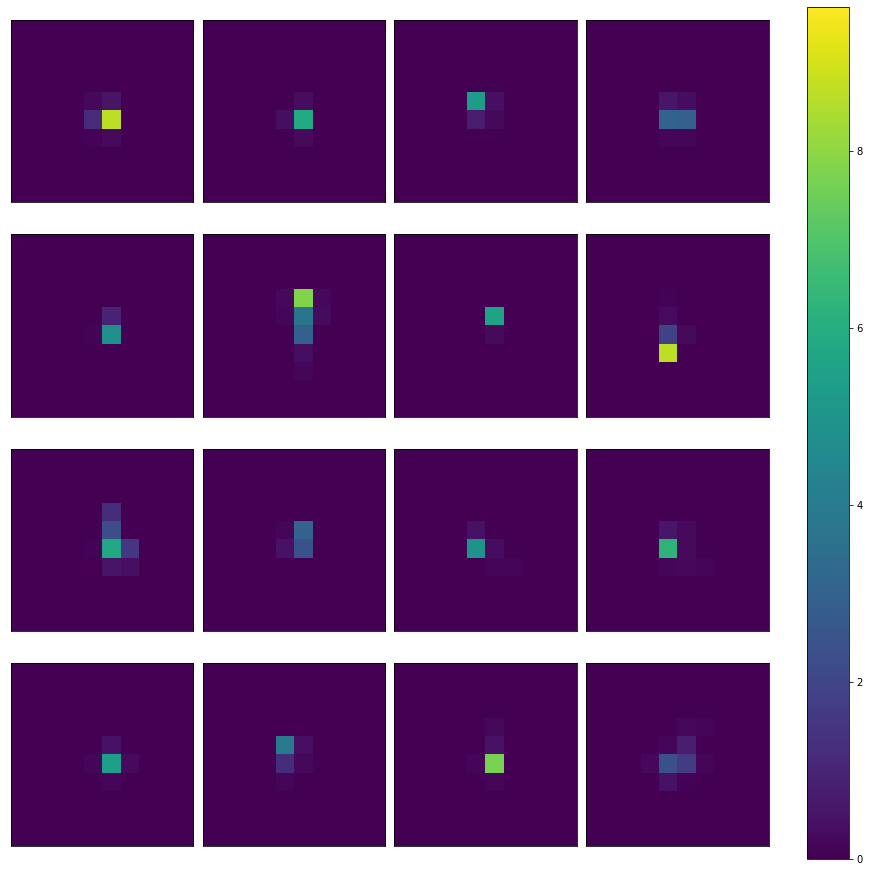

In [15]:
plot_cluster(ClusterN, SupMod, Row, Col, Energy)

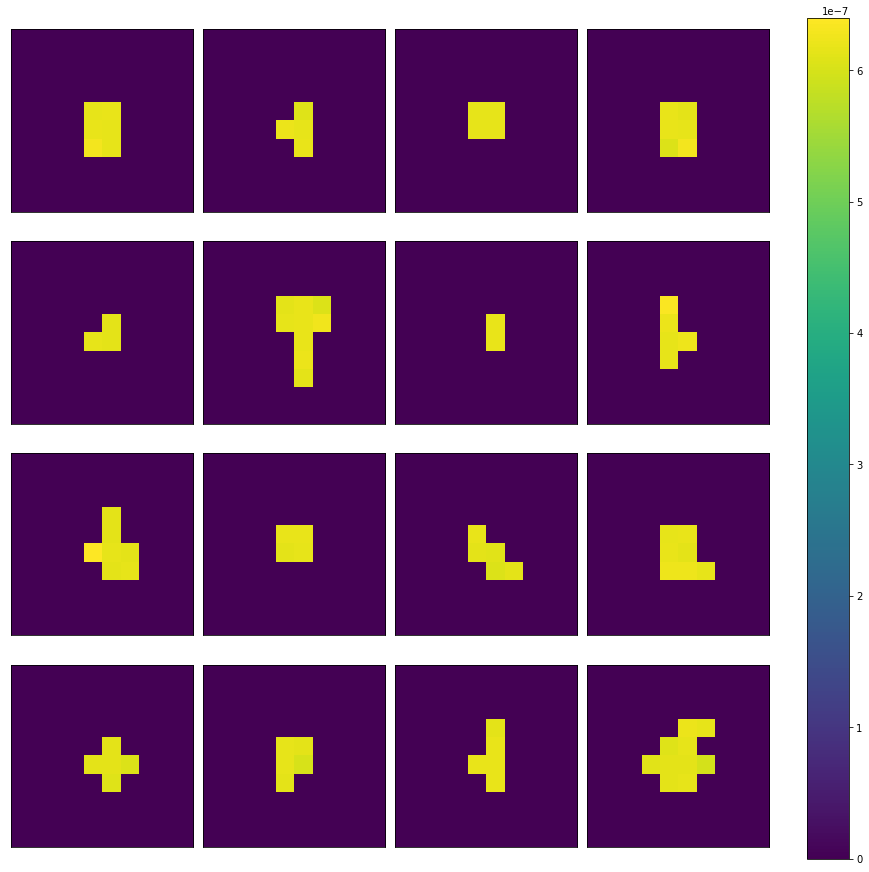

In [16]:
plot_cluster(ClusterN, SupMod, Row, Col, Timing)

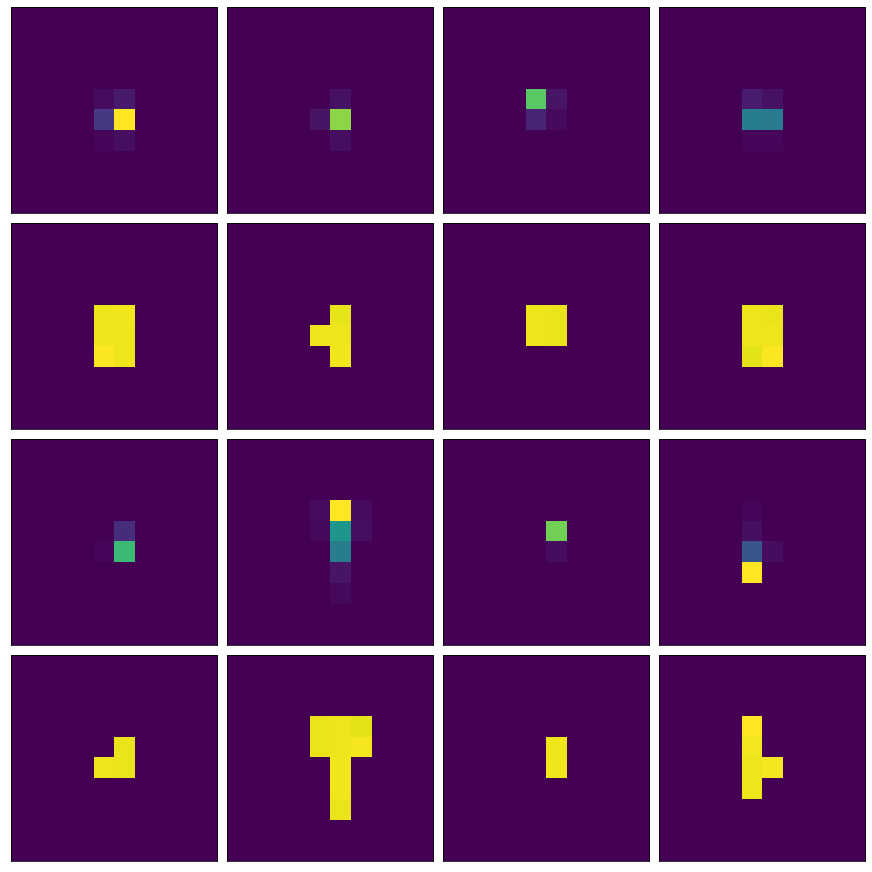

In [17]:
plot_comp(ClusterN, SupMod, Row, Col, Timing, Energy)

In [18]:
tmax = np.max(Timing)
emax = np.max(Energy)

In [19]:
for i in range(nentries):
    if i == 0:
        tmin = np.min(Timing[i,:ClusterN[i]])
        emin = np.min(Energy[i,:ClusterN[i]])
    else:
        tmin = np.min([tmin, np.min(Timing[i,:ClusterN[i]])])
        emin = np.min([emin, np.min(Energy[i,:ClusterN[i]])])

In [21]:
Timing_scaled = np.zeros((nentries, maxClusN), dtype=np.float32)
Energy_scaled = np.zeros((nentries, maxClusN), dtype=np.float32)
for i in range(nentries):
    Timing_scaled[i, :ClusterN[i]] = (Timing[i, :ClusterN[i]] - tmin) / (tmax-tmin) 
    Energy_scaled[i, :ClusterN[i]] = (Energy[i, :ClusterN[i]] - emin) / (emax-emin)

In [22]:
Timing_scaled

array([[0.44500232, 0.4510994 , 0.48096016, ..., 0.        , 0.        ,
        0.        ],
       [0.44670233, 0.37437156, 0.48793858, ..., 0.        , 0.        ,
        0.        ],
       [0.4481948 , 0.43478152, 0.44045493, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.4665797 , 0.47701293, 0.457897  , ..., 0.        , 0.        ,
        0.        ],
       [0.45543554, 0.59238166, 0.5641971 , ..., 0.        , 0.        ,
        0.        ],
       [0.43953463, 0.3449003 , 0.42924565, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

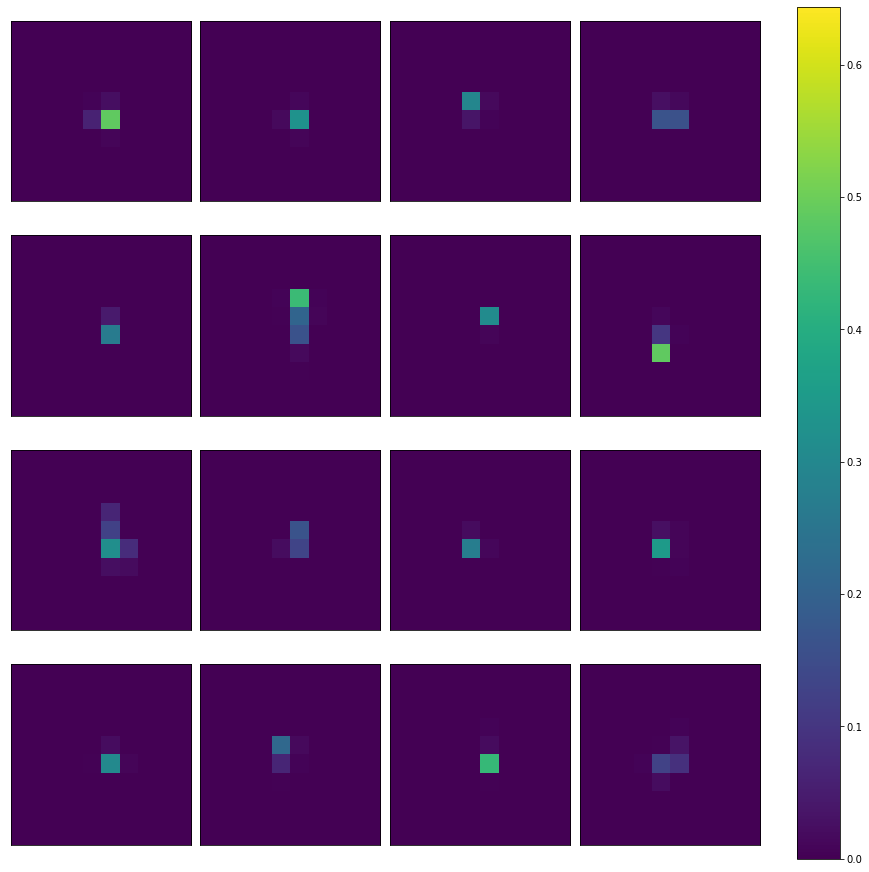

In [23]:
plot_cluster(ClusterN, SupMod, Row, Col, Energy_scaled)

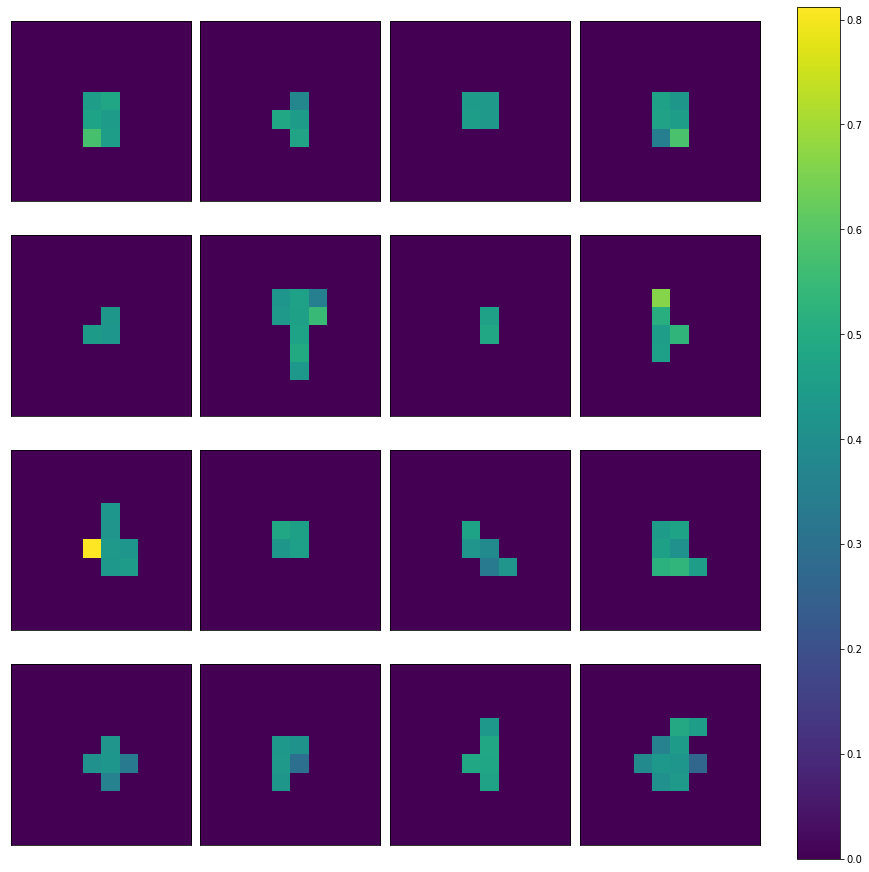

In [24]:
plot_cluster(ClusterN, SupMod, Row, Col, Timing_scaled)

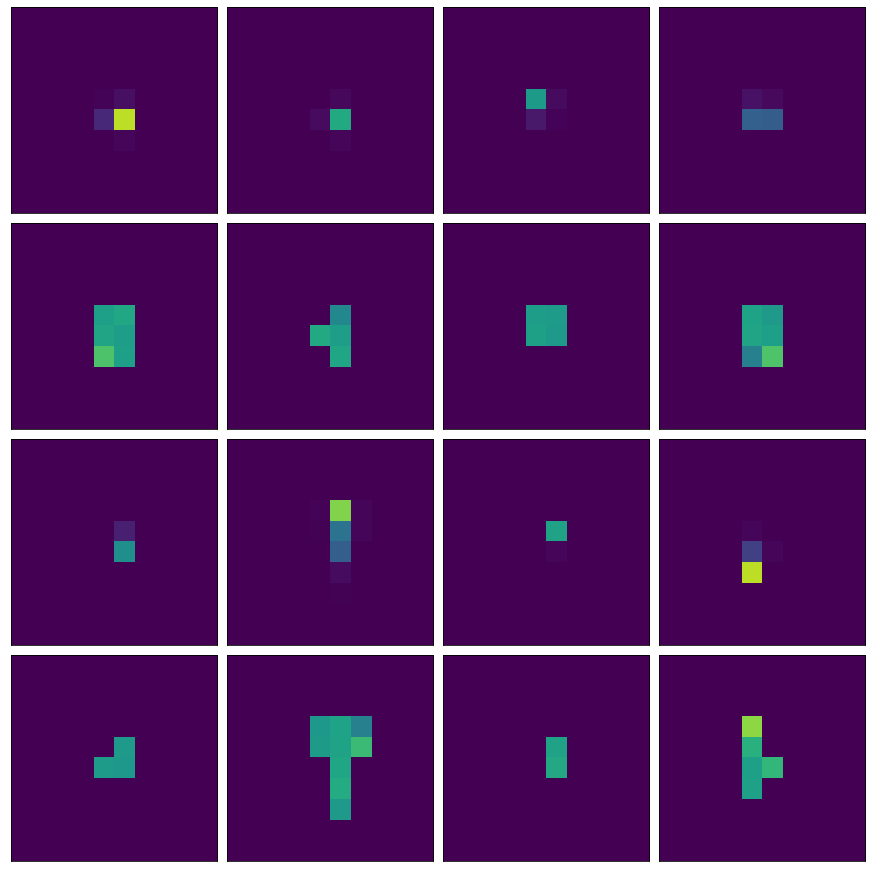

In [25]:
plot_comp(ClusterN, SupMod, Row, Col, Timing_scaled, Energy_scaled)

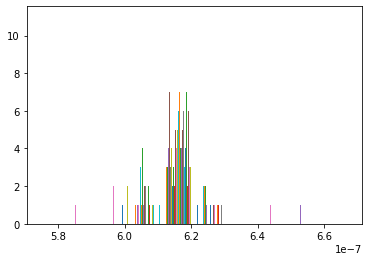

In [26]:
_list = []
for i in range(nentries):
    _list.append(Timing[i,:ClusterN[i]])
    
plt.hist(_list)
plt.show()

In [27]:
r = np.zeros(nentries)
p = np.zeros(nentries)
for i in range(nentries):
    r[i], p[i] = scipy.stats.pearsonr(Energy[i, 0:ClusterN[i]], Timing[i, 0:ClusterN[i]])
    print(i, r[i], p[i])


0 -0.36969338526515905 0.4707235109290396
1 0.011098209163408382 0.9889017908365916
2 0.3351685245319105 0.6648314754680895
3 0.021285119308178047 0.9680771427164745
4 -0.6901045535050596 0.5151290471873433
5 0.1662984857257092 0.6689301955098489
6 -1.0 1.0
7 -0.5475562056080834 0.3394312718456352
8 -0.35380424817672074 0.4362395455030666
9 -0.02096622751158503 0.9790337724884149
10 0.21721978154098054 0.7256178322156583
11 -0.11421298109174609 0.8073681780988406
12 0.49349490308878696 0.3981905785614565
13 0.40179074804927173 0.5025427665647458
14 0.20458075381427107 0.7413482680208433
15 0.21620724885518738 0.5485419369038836
16 -0.20906554621962756 0.6192747256974473
17 0.25275406268222395 0.6816436611652259
18 -0.12137148290051405 0.878628517099486
19 0.10392540222891176 0.8446731192502998
20 0.32057066504135284 0.36648113460947657
21 -0.3426772195354415 0.33238961108656995
22 1.0 1.0
23 0.7052519933313999 0.5016677132752557
24 0.1435803142236021 0.7861095047666554
25 0.86680678536

In [28]:
print(r.mean(), p.mean())

-0.019123170046445807 0.606092969097496
